<figure>
    
![](https://raw.githubusercontent.com/DiegoAscanio/ace-aula-06/main/img/exemplo-73-resposta-rc.png)
    
<figcaption>Figura 1 - Circuito RC</figcaption>
</figure>

A chave do circuito mostrado na Figura 1 esteve na posição \\(x\\) por um longo tempo. Em \\(t = 0\\), ela passa instantaneamente para a posição \\(y\\). Determine:

a) \\( v_{C}(t) \\) para \\( t \geq 0 \\),

b) \\( v_{o}(t) \\) para \\( t \geq 0^+ \\),

c) \\( i_{o}(t) \\) para \\( t \geq 0^+ \\) e

d) a energia total dissipada no resistor de \\( 60 k\Omega \\).

**Letra a)**

Para encontrar a equação que descreve a tensão no capacitor ao longo do tempo, antes de mais nada precisamos encontrar a resistência equivalente composta por \\( 32 k\Omega + 240 k\Omega || 60 k\Omega \\) dada por:

\\[
\begin{align}
R_{\text{eq}} &= {32k \Omega} + {{1} \over {{{1} \over {240 k\Omega}} + {{1} \over {60 k\Omega}}}} \therefore \\\\
R_{\text{eq}} &= 32 k \Omega + 48 k \Omega \therefore \\\\
R_{\text{eq}} &= 80 k \Omega
\end{align}
\\]

Considerando que a tensão no capacitor é dada por:

\\(v_{C}(t) =  v_{C}(0) \cdot e ^ {{-t} \over {RC}} \\)

Que \\(v_{C}(0) = 100 V\\), \\(R = 80 k \Omega\\) e \\(C = {1 \over 2} \mu F \\)

Logo, 

\\(v_{C}(t) =  100 \cdot e ^ {-25 t} \\)

A resposta natural do capacitor é dada por:

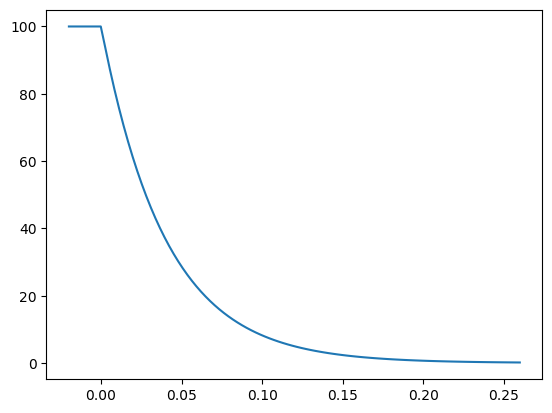

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

t = np.linspace(-0.02, 0.26, 100)
v_neg = np.vectorize(lambda x: 100)(t[t < 0])
v_pos = np.vectorize(lambda x: 100 * np.exp(-25 * x))(t[t >= 0])
v = np.concatenate((v_neg, v_pos))
plt.plot(t, v)
plt.show()

O enunciado não solicita, mas, também plotaremos a corrente \\(I_{R}\\) que passa pelo resistor: 

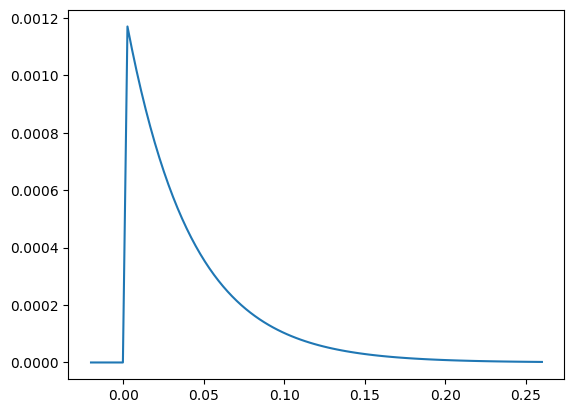

In [2]:
i_neg = np.vectorize(lambda x: 0)(t[t <= 0])
i_pos = np.vectorize(lambda x: 100 * np.exp(-25 * x) / 80000)(t[t > 0])
i = np.concatenate((i_neg, i_pos))
plt.plot(t, i)
plt.show()

**Letra b)**

Para encontrar a equação \\(V_{o}(t)\\) que descreve a tensão no resistor de \\(240 K\Omega\\) ao longo do tempo consideraremos toda a corrente \\(I_{R}\\) que passa pela resistência equivalente de \\(80 K\Omega\\):

\\[
\begin{align}
I_{R} &= {{100 \cdot e ^ {-25 t}} \over {80 k\Omega}} \therefore \\\\
I_{R} &= 1.25 \cdot e ^ {-25 t} mA
\end{align}
\\]

A tensão \\(v_{o}(t)\\) em \\(240 k\Omega \\) é:

\\[
\begin{align}
V_{o} &= V_{C}(t) - 32 k \Omega \cdot I_{R} \therefore \\\\
V_{o} &= 100 \cdot e^{-25 t} V - 32 k \Omega \cdot 1.25 e ^ {-25 t} mA \therefore \\\\
V_{o} &= 100 \cdot e^{-25 t} V - 40 e ^ {-25 t} V \therefore \\\\
V_{o} &= (100 - 40) e ^ {-25 t} V \therefore \\\\
V_{o} &= 60 e ^ {-25 t} V
\end{align}
\\]

O gráfico da tensão no resistor é dado por:

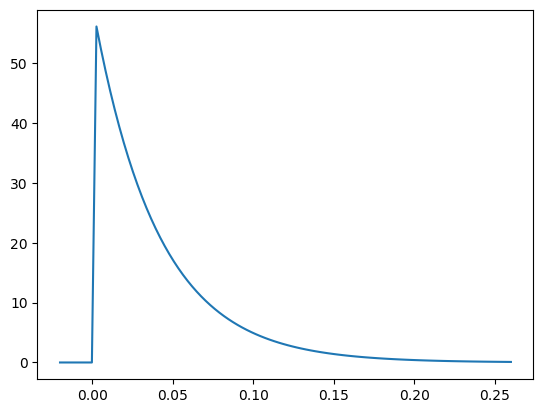

In [3]:
vo_neg = np.vectorize(lambda x: 0)(t[t <= 0])
vo_pos = np.vectorize(lambda x: 60 * np.exp(-25 * x))(t[t > 0])
vo = np.concatenate((vo_neg, vo_pos))
plt.plot(t, vo)
plt.show()

**Letra c)**

Para encontrar a corrente \\(i_o\\) que passa pelo resistor de \\(60 k \Omega\\) devemos considerar três fatores:

1. Existe uma corrente \\(i_n\\) que passa pelo resistor de \\(240 k \Omega\\)
2. \\( 240 k \Omega i_n = 60 k \Omega i_o \\) Assim: \\(i_n = {i_o \over 4}\\)
3. Pela lei de kirchoff das correntes:
\\[
\begin{align}
I_r &= i_n + i_o \therefore \\\\
i_n + i_o &= 1.25 \cdot e ^ {-25 t} mA \therefore \\\\
{i_o \over 4} + i_o &= 1.25 \cdot e^{-25t} mA \therefore \\\\
5 i_o &= 5 \cdot e^{-25t} mA \therefore \\\\
i_o &= e^{-25 t} mA
\end{align}
\\]

O enunciado não solicita, mas, também plotaremos a corrente \\(i_{o}\\) que passa por \\(60 k \Omega\\): 

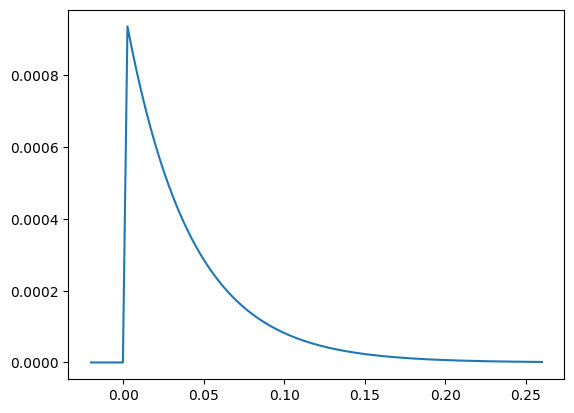

In [5]:
io_neg = np.vectorize(lambda x: 0)(t[t <= 0])
io_pos = np.vectorize(lambda x: 1e-3 * np.exp(-25 * x))(t[t > 0])
io = np.concatenate((io_neg, io_pos))
plt.plot(t, io)
plt.show()

**Letra d)**

A energia total dissipada no resistor de \\( 60 k\Omega \\).

Considerando que

\\[
\begin{align}
    W_{60 k \Omega} &= \int_{0}^{t} P_{60 k \Omega} dt \\\\
    P_{60 k \Omega} &= V_{60 k \Omega} \cdot I_{60 k \Omega} \therefore \\\\
    W_{60 k \Omega} &= \int_{0}^{\infty} {60 e^{-25t} \cdot 10^{-3} e^{-25t}} \therefore \\\\
    W_{60 k \Omega} &= \int_{0}^{\infty} {60 e^{-50t}}  \therefore \\\\
    W_{60 k \Omega} &= {{-60 \cdot 10^-3}\over {50}} \cdot e^{-50 \times \infty} - {{-60 \cdot 10^-3}\over {50}} \cdot e^{-50 \times 0} \therefore \\\\
    W_{60 k \Omega} &= 0 - {{-60 \cdot 10^-3}\over {50}} \cdot 1 \therefore \\\\
    W_{60 k \Omega} &= 1.2mJ
\end{align} 
\\]

O enunciado não solicita, mas, também plotaremos a energia dissipada por \\(60 k \Omega\\): 

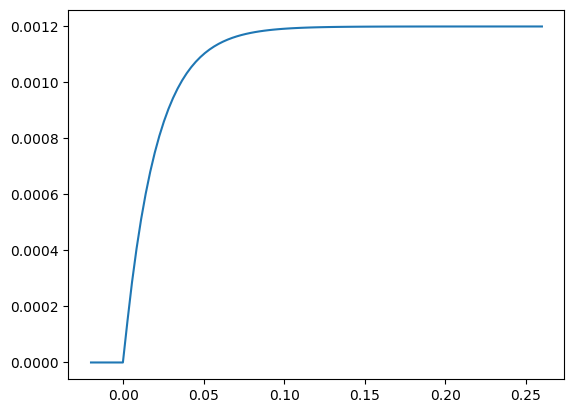

In [6]:
Wo_neg = np.vectorize(lambda x: 0)(t[t < 0])
Wo_pos = np.vectorize(lambda x: 1.2e-3 * (1 - np.exp(-50 * x)))(t[t >= 0])
Wo = np.concatenate((Wo_neg, Wo_pos))
plt.plot(t, Wo)
plt.show()
